# **Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils import resample

In [2]:
# Load the dataset
file_path = "/content/drive/MyDrive/Updated_Bus_Dataset.csv"
data = pd.read_csv(file_path)

In [3]:
# Inspect the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Vehicle_Model        975 non-null    object 
 1   Mileage              975 non-null    int64  
 2   Bus Route            975 non-null    int64  
 3   Maintenance_History  975 non-null    object 
 4   Reported_Issues      975 non-null    int64  
 5   Vehicle_Age          975 non-null    int64  
 6   Fuel_Type            975 non-null    object 
 7   Transmission_Type    975 non-null    object 
 8   Odometer_Reading     975 non-null    int64  
 9   Last_Service_Date    975 non-null    object 
 10  Service_History      975 non-null    int64  
 11  Accident_History     975 non-null    int64  
 12  Fuel_Efficiency      975 non-null    float64
 13  Tire_Condition       975 non-null    object 
 14  Battery_Status       975 non-null    object 
 15  Need_Maintenance     975 non-null    boo

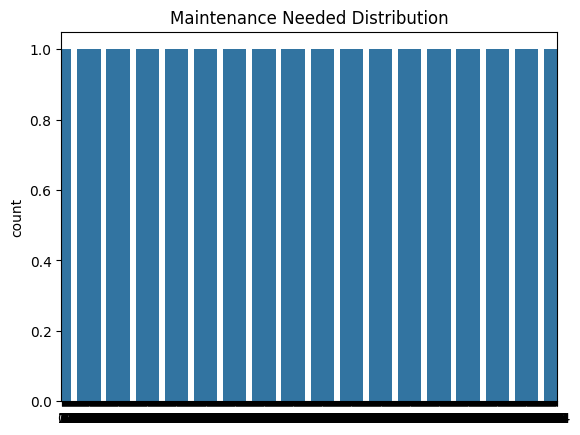

In [4]:
# Visualization of the "Need Maintenance" distribution
sns.countplot(data['Need_Maintenance'])
plt.title("Maintenance Needed Distribution")
plt.show()

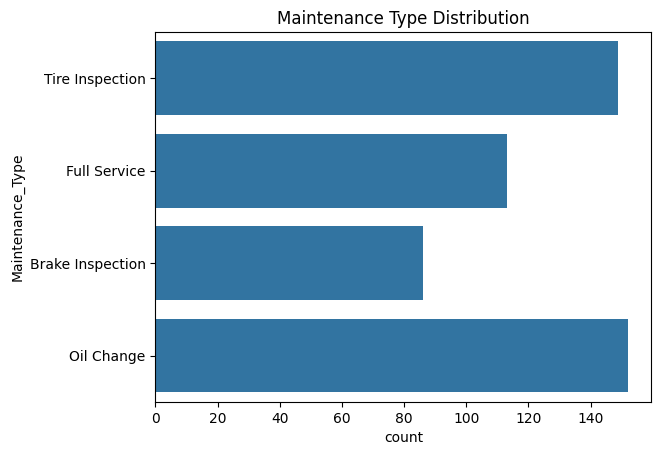

In [5]:
# Visualize Maintenance Type
sns.countplot(data['Maintenance_Type'])
plt.title("Maintenance Type Distribution")
plt.show()

In [6]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Vehicle_Model            0
Mileage                  0
Bus Route                0
Maintenance_History      0
Reported_Issues          0
Vehicle_Age              0
Fuel_Type                0
Transmission_Type        0
Odometer_Reading         0
Last_Service_Date        0
Service_History          0
Accident_History         0
Fuel_Efficiency          0
Tire_Condition           0
Battery_Status           0
Need_Maintenance         0
Brake_Pad_Thickness      0
Oil_Level                0
Maintenance_Type       475
dtype: int64


In [7]:
# Replace missing values in the Maintenance_Type column with 'None'
data['Maintenance_Type'].fillna('None', inplace=True)

# Verify if there are any missing values left
print(data['Maintenance_Type'].isnull().sum())


0


<ipython-input-7-fc2009349abc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Maintenance_Type'].fillna('None', inplace=True)


In [8]:
# Encode categorical columns
categorical_cols = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type',
                    'Tire_Condition', 'Battery_Status', 'Maintenance_Type']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [10]:
# Convert 'Last_Service_Date' to datetime objects
data['Last_Service_Date'] = pd.to_datetime(data['Last_Service_Date'], errors='coerce')


In [11]:
# Extract numerical features from the datetime column
# days since a reference date
reference_date = pd.to_datetime('today')
data['Days_Since_Service'] = (reference_date - data['Last_Service_Date']).dt.days


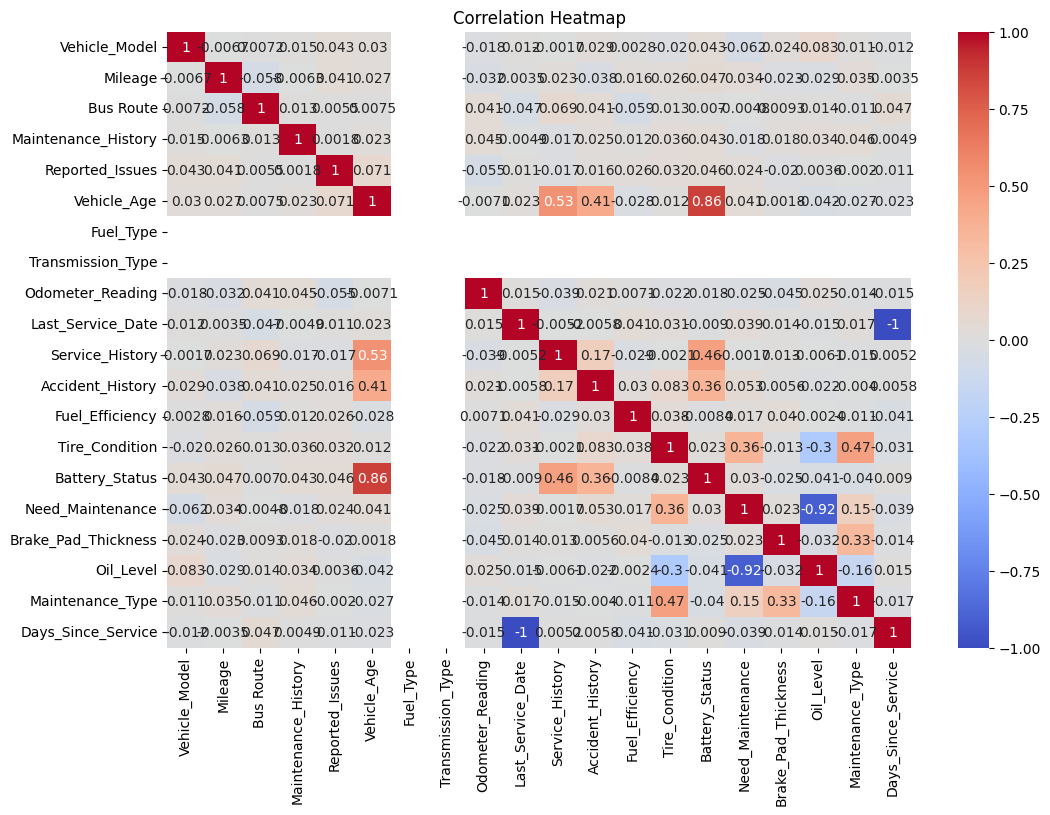

In [12]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
# Feature Selection: Separate continuous, categorical, and temporal columns
continuous_features = ['Mileage', 'Odometer_Reading', 'Fuel_Efficiency', 'Brake_Pad_Thickness', 'Oil_Level']
categorical_features = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type',
                        'Tire_Condition', 'Battery_Status']
temporal_features = ['Vehicle_Age']


In [14]:
# Standardize continuous features
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [15]:
# Separate features (X) and target variables (y)
X = data.drop(['Need_Maintenance', 'Maintenance_Type', 'Last_Service_Date'], axis=1)
y_maintenance = data['Need_Maintenance']
y_type = data['Maintenance_Type']


**Train-test Split**

In [16]:
# Split data into train and test sets
X_train, X_test, y_train_maintenance, y_test_maintenance = train_test_split(X, y_maintenance, test_size=0.2, random_state=42)
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X, y_type, test_size=0.2, random_state=42)


# **Model Architecture**

In [17]:
# Random Forest for Binary Classification (Need Maintenance)
rf_maintenance = RandomForestClassifier(random_state=42)
rf_maintenance.fit(X_train, y_train_maintenance)

RandomForestClassifier(random_state=42)

In [18]:
# Random Forest for Multiclass Classification (Maintenance Type)
rf_type = RandomForestClassifier(random_state=42)
rf_type.fit(X_train_type, y_train_type)

RandomForestClassifier(random_state=42)

# **Evaluation**

In [19]:
# Predict Maintenance Need
y_pred_maintenance = rf_maintenance.predict(X_test)
print("Classification Report for Maintenance Need:")
print(classification_report(y_test_maintenance, y_pred_maintenance))
print("Accuracy:", accuracy_score(y_test_maintenance, y_pred_maintenance))
print("F1 Score:", f1_score(y_test_maintenance, y_pred_maintenance))

Classification Report for Maintenance Need:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        96
        True       1.00      1.00      1.00        99

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Accuracy: 1.0
F1 Score: 1.0


In [20]:
# Predict Maintenance Type
y_pred_type = rf_type.predict(X_test_type)
print("Classification Report for Maintenance Type:")
print(classification_report(y_test_type, y_pred_type))
print("Accuracy:", accuracy_score(y_test_type, y_pred_type))


Classification Report for Maintenance Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Accuracy: 1.0


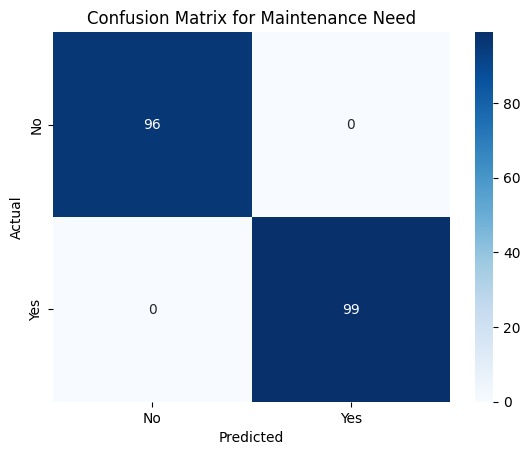

In [21]:
# Confusion Matrix for Maintenance Need
cm = confusion_matrix(y_test_maintenance, y_pred_maintenance)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix for Maintenance Need")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Accuracy Calculations**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

In [28]:
# Range of tree numbers to evaluate
tree_numbers = [10, 50, 100, 150]

# Lists to store results
train_accuracies = []
test_accuracies = []
test_losses = []

for n in tree_numbers:
    # Initialize the Random Forest model with 'n' trees
    rf = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model on the training set
    rf.fit(X_train, y_train_maintenance)

    # Predict on training and testing data
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    y_test_prob = rf.predict_proba(X_test)  # For loss calculation

    # Calculate accuracy for train and test sets
    train_accuracies.append(accuracy_score(y_train_maintenance, y_train_pred))
    test_accuracies.append(accuracy_score(y_test_maintenance, y_test_pred))

    # Calculate log loss for the test set
    test_losses.append(log_loss(y_test_maintenance, y_test_prob))


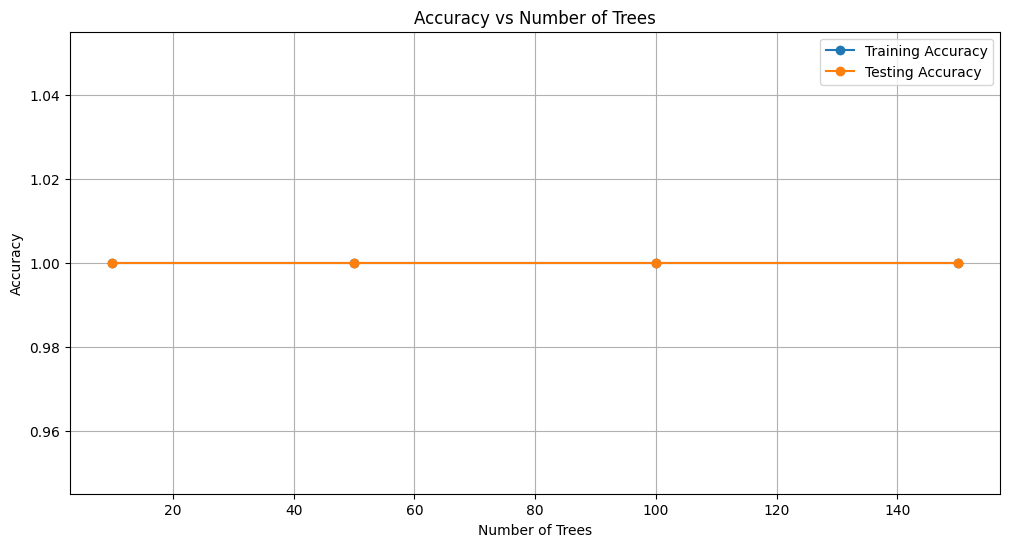

In [29]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(tree_numbers, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(tree_numbers, test_accuracies, label="Testing Accuracy", marker='o')
plt.title("Accuracy vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


**Loss Calculation**

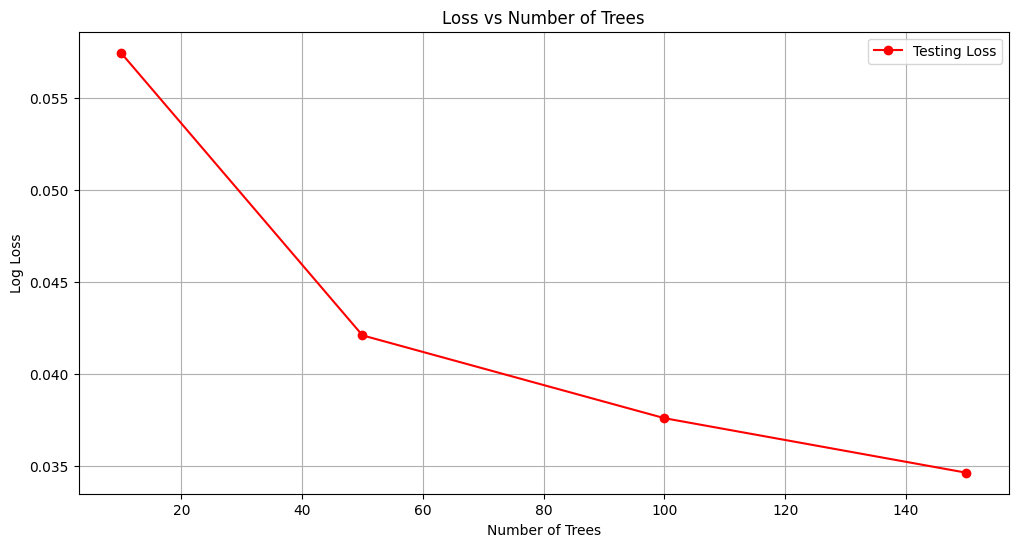

In [30]:
# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(tree_numbers, test_losses, label="Testing Loss", marker='o', color='red')
plt.title("Loss vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()

**Overfitting/Underfitting Check**

In [31]:
# Check for Overfitting: Compare train and test accuracies
train_accuracy = rf_maintenance.score(X_train, y_train_maintenance)
test_accuracy = rf_maintenance.score(X_test, y_test_maintenance)

In [32]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 1.0


**Feature Importance**

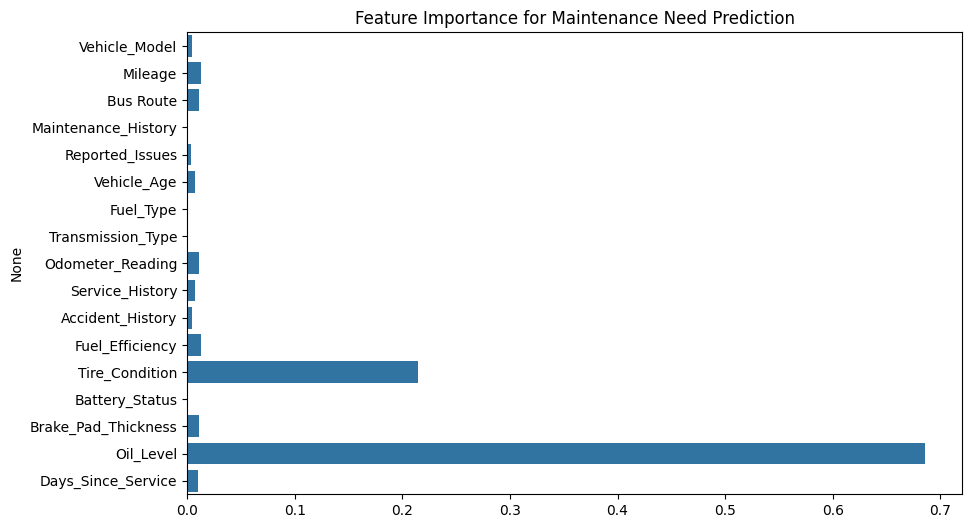

In [33]:
# Plot feature importance for Need Maintenance model
feature_importances = rf_maintenance.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance for Maintenance Need Prediction")
plt.show()

**Loss/Accuracy Trends**

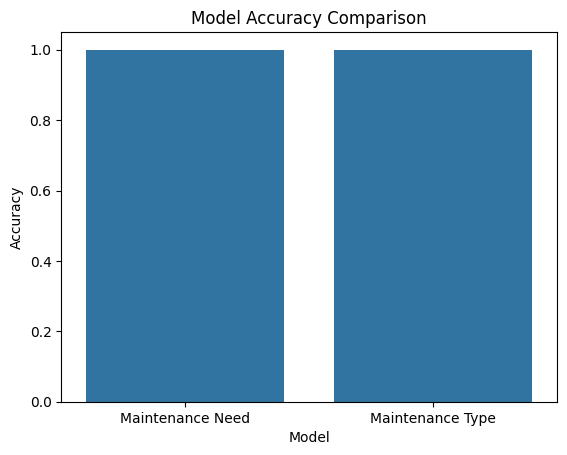

In [34]:
# Accuracy Visualization
results = pd.DataFrame({
    "Accuracy": [accuracy_score(y_test_maintenance, y_pred_maintenance),
                 accuracy_score(y_test_type, y_pred_type)],
    "Model": ["Maintenance Need", "Maintenance Type"]
})

sns.barplot(x="Model", y="Accuracy", data=results)
plt.title("Model Accuracy Comparison")
plt.show()
